In [13]:
## This is the beginning of SE176078 data from a single-cell and spatially 
### resolved atlas of human breast cancers.
import os
from scipy.io import mmread
import pandas as pd
import scanpy as sc
extract_dir = os.path.expanduser("~/Desktop/Capstone/Raw Data/GSE176078/")

# 1. Load matrix and transpose
X = mmread(os.path.join(extract_dir, "count_matrix_sparse.mtx")).tocsr().T

# 2. Load genes
genes = pd.read_csv(os.path.join(extract_dir, "count_matrix_genes.tsv"), sep="\t", header=None)
genes.columns = ["gene_id"]

# 3. Load barcodes
barcodes = pd.read_csv(os.path.join(extract_dir, "count_matrix_barcodes.tsv"), sep="\t", header=None)
barcodes.columns = ["cell_id"]

# 4. Load metadata
metadata = pd.read_csv(os.path.join(extract_dir, "metadata.csv"))

# 5. Build AnnData object
adata = sc.AnnData(X)

# Assign gene names (columns)
adata.var_names = genes["gene_id"].astype(str).values
adata.var_names_make_unique()

# Assign cell barcodes (rows)
adata.obs_names = barcodes["cell_id"].astype(str).values

# Assign metadata
metadata.index = adata.obs_names
adata.obs = metadata

print(adata)

AnnData object with n_obs × n_vars = 100064 × 29733
    obs: 'Unnamed: 0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'subtype', 'celltype_subset', 'celltype_minor', 'celltype_major'


In [90]:
extract_dir = "/Users/adi/Desktop/Capstone/Raw data/GSE176078"

# Load count matrix
X = mmread(os.path.join(extract_dir, "count_matrix_sparse.mtx")).T.tocsr()  # Transpose needed

# Load barcodes (cells)
barcodes = pd.read_csv(os.path.join(extract_dir, "count_matrix_barcodes.tsv"), header=None)[0].tolist()

# Load genes
#genes = pd.read_csv(os.path.join(extract_dir, "count_matrix_genes.tsv"), header=None)
#gene_symbols = genes[1].tolist()

genes = pd.read_csv(os.path.join(extract_dir, "count_matrix_genes.tsv"), header=None, sep="\t")
gene_symbols = genes[0].tolist()

# Create AnnData object
adata = sc.AnnData(X=X)
adata.obs_names = barcodes
adata.var_names = gene_symbols

# Load metadata
metadata = pd.read_csv(os.path.join(extract_dir, "metadata.csv"))
adata.obs = metadata.set_index(adata.obs_names)

# Final check
print(adata)
print("🧬 Tumor subtypes:", adata.obs['subtype'].unique())

AnnData object with n_obs × n_vars = 100064 × 29733
    obs: 'Unnamed: 0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'subtype', 'celltype_subset', 'celltype_minor', 'celltype_major'
🧬 Tumor subtypes: ['HER2+' 'TNBC' 'ER+']


In [91]:
from scipy.io import mmread
mtx_path = os.path.join(extract_dir, "count_matrix_sparse.mtx")
X = mmread(os.path.join(extract_dir, "count_matrix_sparse.mtx")).tocsr().T

# Load genes
genes = pd.read_csv(os.path.join(extract_dir, "count_matrix_genes.tsv"), sep="\t", header=None)
genes.columns = ["gene_id"]

# Load barcodes
barcodes = pd.read_csv(os.path.join(extract_dir, "count_matrix_barcodes.tsv"), sep="\t", header=None)
barcodes.columns = ["cell_id"]

# Load metadata
metadata = pd.read_csv(os.path.join(extract_dir, "metadata.csv"))

# Create AnnData
adata = sc.AnnData(X)

# Set .var_names using gene IDs
adata.var_names = genes["gene_id"].astype(str).values
adata.var_names_make_unique()

# Set .obs using barcodes and align metadata
adata.obs_names = barcodes["cell_id"].astype(str).values
metadata.index = adata.obs_names
adata.obs = metadata


In [92]:
# Define ghost cells as those with low RNA counts or high mito percentage
adata.obs['is_ghost'] = (
    (adata.obs['nCount_RNA'] < 1500) | 
    (adata.obs['percent.mito'] > 15)
).astype(int)

# Summary count
adata.obs['is_ghost'].value_counts()

#adata.obs.groupby('orig.ident')['is_ghost'].mean()

is_ghost
0    80123
1    19941
Name: count, dtype: int64

In [93]:
## Cell cycle genes feature in our datset
# Seurat v3 cell cycle gene sets (subset)
s_genes = [
    'MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG', 'GINS2',
    'MCM6', 'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 'MCM10', 'HELLS', 'RFC2', 'RPA2',
    'NASP', 'RAD51AP1', 'GMNN', 'WDR76', 'SLBP', 'CCNE2', 'UBR7', 'POLD3',
    'MSH2', 'ATAD2', 'RAD51', 'RRM2', 'CDC45', 'CDC6', 'EXO1', 'TIPIN', 'DSCC1',
    'BLM', 'CASP8AP2', 'USP1', 'CLSPN', 'POLA1', 'CHAF1B', 'BRIP1', 'E2F8'
]

g2m_genes = [
    'HMGB2', 'CDK1', 'NUSAP1', 'UBE2C', 'BIRC5', 'TPX2', 'TOP2A', 'NDC80',
    'CKS2', 'NUF2', 'CKS1B', 'MKI67', 'TMPO', 'CENPF', 'TACC3', 'FAM64A',
    'SMC4', 'CCNB2', 'CKAP2L', 'CKAP2', 'AURKB', 'BUB1', 'KIF11', 'ANP32E',
    'TUBB4B', 'GTSE1', 'KIF20B', 'HJURP', 'CDC20', 'TTK', 'CDC25C', 'KIF2C',
    'RANGAP1', 'NCAPD2', 'DLGAP5', 'CDCA3', 'HN1', 'CDC45', 'CDCA8', 'ECT2',
    'KIF23', 'HMMR', 'AURKA', 'PSRC1', 'ANLN', 'LBR', 'CKAP5', 'CENPE',
    'CTCF', 'NEK2', 'G2E3', 'GAS2L3', 'CBX5', 'CENPA'
]

# Filter for genes present in your dataset
s_genes = [g for g in s_genes if g in adata.var_names]
g2m_genes = [g for g in g2m_genes if g in adata.var_names]

# Compute cell cycle scores
import scanpy as sc
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

# Output: adata.obs now includes:
# 'S_score', 'G2M_score', 'phase'


In [ ]:
## Apoptosis score feature
# Apoptosis gene list (example set — you can refine this)
apoptosis_genes = [
    'BAX', 'BAK1', 'CASP3', 'CASP8', 'BCL2L11', 'FAS', 'TP53', 'BBC3', 'CYCS'
]
apoptosis_genes = [gene for gene in apoptosis_genes if gene in adata.var_names]

# Compute score
sc.tl.score_genes(adata, gene_list=apoptosis_genes, score_name='apoptosis_score')

In [ ]:
import numpy as np
## % Ribosomal as a feature

# Identify ribosomal genes (common prefixes: RPS, RPL)
ribo_genes = [gene for gene in adata.var_names if gene.startswith('RPS') or gene.startswith('RPL')]

# Total counts per cell
total_counts = adata.X.sum(axis=1).A1 if isinstance(adata.X, np.matrix) or hasattr(adata.X, 'A1') else adata.X.sum(axis=1)

# Ribosomal counts per cell
ribo_counts = adata[:, ribo_genes].X.sum(axis=1).A1 if hasattr(adata[:, ribo_genes].X, 'A1') else adata[:, ribo_genes].X.sum(axis=1)

# Percent ribosomal
adata.obs['pct_counts_ribo'] = (ribo_counts / total_counts) * 100

In [ ]:
## Oxphos genes
oxphos_genes = [
    "ATP5F1A", "ATP5F1B", "ATP5MC1", "ATP5MC2", "ATP5ME", "ATP5MG",
    "COX4I1", "COX5A", "COX6A1", "COX6C", "NDUFA1", "NDUFA2", "NDUFA4",
    "NDUFAB1", "NDUFB2", "NDUFB3", "NDUFS1", "NDUFS2", "NDUFV1", "UQCRC1",
    "UQCRC2", "UQCRH", "SDHA", "SDHB", "SDHC", "SDHD", "CYCS"
]
# Filter genes present in the dataset
oxphos_genes_present = [g for g in oxphos_genes if g in adata.var_names]
sc.tl.score_genes(adata, gene_list=oxphos_genes_present, score_name="oxphos_score")

# Check the new feature added
#print(adata.obs[["oxphos_score"]].head())

In [ ]:
adata.obs.sample(10)

Unnamed: 0 orig.ident  nCount_RNA  \
CID44971_TTTCCTCAGGATGGTC  CID44971_TTTCCTCAGGATGGTC   CID44971       44127   
CID4067_ACGTCAATCACAAACC    CID4067_ACGTCAATCACAAACC    CID4067        1177   
CID4471_GTACTCCAGGGATCTG    CID4471_GTACTCCAGGGATCTG    CID4471        5994   
CID4465_TGCCCATGTCAGCTAT    CID4465_TGCCCATGTCAGCTAT    CID4465        1593   
CID4495_CATGGCGGTCACTTCC    CID4495_CATGGCGGTCACTTCC    CID4495        1959   
CID44041_AGAGCTTCAAAGGAAG  CID44041_AGAGCTTCAAAGGAAG   CID44041        5861   
CID4535_TGCGCAGGTTCGCGAC    CID4535_TGCGCAGGTTCGCGAC    CID4535        5345   
CID4495_CCACGGACAATAGCAA    CID4495_CCACGGACAATAGCAA    CID4495        3205   
CID44971_CTGTGCTTCAACACCA  CID44971_CTGTGCTTCAACACCA   CID44971        1130   
CID44041_CCTCTGATCTTGCATT  CID44041_CCTCTGATCTTGCATT   CID44041        2213   

                           nFeature_RNA  percent.mito subtype  \
CID44971_TTTCCTCAGGATGGTC          6673      9.760464    TNBC   
CID4067_ACGTCAATCACAAACC            542      2.124044     ER+   
CID4471_GTACTCCAGGGATCTG           1972      6.690023     ER+   
CID4465_TGCCCATGTCAGCTAT            961      6.528562    TNBC   
CID4495_CATGGCGGTCACTTCC            962     10.158244    TNBC   
CID44041_AGAGCTTCAAAGGAAG          2170      4.316670    TNBC   
CID4535_TGCGCAGGTTCGCGAC           1881      4.808232     ER+   
CID4495_CCACGGACAATAGCAA           1304      3.900156    TNBC   
CID44971_CTGTGCTTCAACACCA           600      8.141593    TNBC   
CID44041_CCTCTGATCTTGCATT           894      2.349751    TNBC   

                                      celltype_subset      celltype_minor  \
CID44971_TTTCCTCAGGATGGTC              Cancer Cycling      Cancer Cycling   
CID4067_ACGTCAATCACAAACC         T_cells_c1_CD4+_IL7R        T cells CD4+   
CID4471_GTACTCCAGGGATCTG            Endothelial ACKR1   Endothelial ACKR1   
CID4465_TGCCCATGTCAGCTAT               Cancer Cycling      Cancer Cycling   
CID4495_CATGGCGGTCACTTCC        T_cells_c4_CD8+_ZFP36        T cells CD8+   
CID44041_AGAGCTTCAAAGGAAG          CAFs myCAF like s5     CAFs myCAF-like   
CID4535_TGCGCAGGTTCGCGAC        PVL Differentiated s3  PVL Differentiated   
CID4495_CCACGGACAATAGCAA   T_cells_c3_CD4+_Tfh_CXCL13        T cells CD4+   
CID44971_CTGTGCTTCAACACCA        T_cells_c1_CD4+_IL7R        T cells CD4+   
CID44041_CCTCTGATCTTGCATT       T_cells_c4_CD8+_ZFP36        T cells CD8+   

                              celltype_major  is_ghost   S_score  G2M_score  \
CID44971_TTTCCTCAGGATGGTC  Cancer Epithelial         0  2.541226   1.235867   
CID4067_ACGTCAATCACAAACC             T-cells         1  0.038055  -0.015595   
CID4471_GTACTCCAGGGATCTG         Endothelial         0  0.012685  -0.401559   
CID4465_TGCCCATGTCAGCTAT   Cancer Epithelial         0  0.076110   0.040936   
CID4495_CATGGCGGTCACTTCC             T-cells         0  0.016913  -0.145224   
CID44041_AGAGCTTCAAAGGAAG               CAFs         0 -0.052854  -0.399610   
CID4535_TGCGCAGGTTCGCGAC                 PVL         0 -0.035941  -0.281676   
CID4495_CCACGGACAATAGCAA             T-cells         0  0.008457  -0.197856   
CID44971_CTGTGCTTCAACACCA            T-cells         1 -0.002114  -0.060429   
CID44041_CCTCTGATCTTGCATT            T-cells         0 -0.029598  -0.043860   

                          phase  apoptosis_score  pct_counts_ribo  \
CID44971_TTTCCTCAGGATGGTC     S        -4.825796        11.974528   
CID4067_ACGTCAATCACAAACC      S         0.243439        23.024639   
CID4471_GTACTCCAGGGATCTG      S        -1.110553        17.550884   
CID4465_TGCCCATGTCAGCTAT      S         0.313791         5.084746   
CID4495_CATGGCGGTCACTTCC      S        -0.276382        17.815212   
CID44041_AGAGCTTCAAAGGAAG    G1        -0.476829        19.689473   
CID4535_TGCGCAGGTTCGCGAC     G1        -0.621999        21.665108   
CID4495_CCACGGACAATAGCAA      S        -0.154104        28.455538   
CID44971_CTGTGCTTCAACACCA    G1        -0.165829        29.026549   
CID44041_CCTCTGATCTTGCATT    G1        -0.245673

In [98]:
adata.var.sample(20)

Empty DataFrame
Columns: []
Index: [RP11-950C14.3, ZNF442, TBRG4, HNRNPU-AS1, C3orf70, CDK5R2, TMEM165, RP11-15E1.5, ARL4D, PAFAH2, PRPS2, RP11-377G16.2, RP11-754B17.1, CIART, RP11-640L9.1, KRT33A, CCDC38, RP1-102E24.8, PNOC, SUCLA2]

In [99]:
adata.obs.drop(columns=['Unnamed: 0', 'is_ghost'], inplace=True)
adata.obs.head(5)

orig.ident  nCount_RNA  nFeature_RNA  percent.mito  \
CID3586_AAGACCTCAGCATGAG    CID3586        4581          1689      1.506221   
CID3586_AAGGTTCGTAGTACCT    CID3586        1726           779      5.793743   
CID3586_ACCAGTAGTTGTGGCC    CID3586        1229           514      1.383238   
CID3586_ACCCACTAGATGTCGG    CID3586        1352           609      1.923077   
CID3586_ACTGATGGTCAACTGT    CID3586        1711           807     13.325541   

                         subtype    celltype_subset     celltype_minor  \
CID3586_AAGACCTCAGCATGAG   HER2+  Endothelial ACKR1  Endothelial ACKR1   
CID3586_AAGGTTCGTAGTACCT   HER2+  Endothelial ACKR1  Endothelial ACKR1   
CID3586_ACCAGTAGTTGTGGCC   HER2+  Endothelial ACKR1  Endothelial ACKR1   
CID3586_ACCCACTAGATGTCGG   HER2+  Endothelial ACKR1  Endothelial ACKR1   
CID3586_ACTGATGGTCAACTGT   HER2+  Endothelial ACKR1  Endothelial ACKR1   

                         celltype_major   S_score  G2M_score phase  \
CID3586_AAGACCTCAGCATGAG    Endothelial -0.038055  -0.312865    G1   
CID3586_AAGGTTCGTAGTACCT    Endothelial -0.048626  -0.187135    G1   
CID3586_ACCAGTAGTTGTGGCC    Endothelial -0.016913  -0.127680    G1   
CID3586_ACCCACTAGATGTCGG    Endothelial -0.021142  -0.100390    G1   
CID3586_ACTGATGGTCAACTGT    Endothelial  0.012685  -0.171540     S   

                          apoptosis_score  pct_counts_ribo  oxphos_score  
CID3586_AAGACCTCAGCATGAG        -0.632049        25.889544      0.495952  
CID3586_AAGGTTCGTAGTACCT        -0.286432        26.303592      0.075952  
CID3586_ACCAGTAGTTGTGGCC        -0.211055        33.604557     -0.024524  
CID3586_ACCCACTAGATGTCGG        -0.216080        31.878698      0.050714  
CID3586_ACTGATGGTCAACTGT        -0.306533        19.929866     -0.081905

In [ ]:
# Redefine ghost cells using multi-feature thresholds
adata.obs['ghost_class'] = (
    (adata.obs['nCount_RNA'] < 1500) |
    (adata.obs['percent.mito'] > 15) |
    (adata.obs['pct_counts_ribo'] < 8) |
    (adata.obs['apoptosis_score'] > 0.5) |
    (adata.obs['oxphos_score'] < 0.5)
).astype(int)

# Summary of new ghost classifications
print("🔍 Refined ghost cell counts:")
print(adata.obs['ghost_class'].value_counts())

🔍 Refined ghost cell counts:
ghost_class
1    77968
0    22096
Name: count, dtype: int64


In [102]:
adata.obs.head(10)

orig.ident  nCount_RNA  nFeature_RNA  percent.mito  \
CID3586_AAGACCTCAGCATGAG    CID3586        4581          1689      1.506221   
CID3586_AAGGTTCGTAGTACCT    CID3586        1726           779      5.793743   
CID3586_ACCAGTAGTTGTGGCC    CID3586        1229           514      1.383238   
CID3586_ACCCACTAGATGTCGG    CID3586        1352           609      1.923077   
CID3586_ACTGATGGTCAACTGT    CID3586        1711           807     13.325541   
CID3586_ACTTGTTAGGGAAACA    CID3586        1468           764      3.610354   
CID3586_AGCAGCCTCCCTCTTT    CID3586        1072           567      2.332090   
CID3586_AGCTTGATCGGCGCTA    CID3586        1662           924      7.521059   
CID3586_ATCATCTAGGGATACC    CID3586        1593           828      5.273070   
CID3586_ATGGGAGAGGAGCGAG    CID3586        1959           966      1.633486   

                         subtype    celltype_subset     celltype_minor  \
CID3586_AAGACCTCAGCATGAG   HER2+  Endothelial ACKR1  Endothelial ACKR1   
CID3586_AAGGTTCGTAGTACCT   HER2+  Endothelial ACKR1  Endothelial ACKR1   
CID3586_ACCAGTAGTTGTGGCC   HER2+  Endothelial ACKR1  Endothelial ACKR1   
CID3586_ACCCACTAGATGTCGG   HER2+  Endothelial ACKR1  Endothelial ACKR1   
CID3586_ACTGATGGTCAACTGT   HER2+  Endothelial ACKR1  Endothelial ACKR1   
CID3586_ACTTGTTAGGGAAACA   HER2+  Endothelial ACKR1  Endothelial ACKR1   
CID3586_AGCAGCCTCCCTCTTT   HER2+  Endothelial ACKR1  Endothelial ACKR1   
CID3586_AGCTTGATCGGCGCTA   HER2+  Endothelial ACKR1  Endothelial ACKR1   
CID3586_ATCATCTAGGGATACC   HER2+  Endothelial ACKR1  Endothelial ACKR1   
CID3586_ATGGGAGAGGAGCGAG   HER2+  Endothelial ACKR1  Endothelial ACKR1   

                         celltype_major   S_score  G2M_score phase  \
CID3586_AAGACCTCAGCATGAG    Endothelial -0.038055  -0.312865    G1   
CID3586_AAGGTTCGTAGTACCT    Endothelial -0.048626  -0.187135    G1   
CID3586_ACCAGTAGTTGTGGCC    Endothelial -0.016913  -0.127680    G1   
CID3586_ACCCACTAGATGTCGG    Endothelial -0.021142  -0.100390    G1   
CID3586_ACTGATGGTCAACTGT    Endothelial  0.012685  -0.171540     S   
CID3586_ACTTGTTAGGGAAACA    Endothelial  0.008457  -0.100390     S   
CID3586_AGCAGCCTCCCTCTTT    Endothelial -0.029598  -0.081871    G1   
CID3586_AGCTTGATCGGCGCTA    Endothelial -0.014799  -0.127680    G1   
CID3586_ATCATCTAGGGATACC    Endothelial -0.046512  -0.150097    G1   
CID3586_ATGGGAGAGGAGCGAG    Endothelial  0.002114  -0.134503     S   

                          apoptosis_score  pct_counts_ribo  oxphos_score  \
CID3586_AAGACCTCAGCATGAG        -0.632049        25.889544      0.495952   
CID3586_AAGGTTCGTAGTACCT        -0.286432        26.303592      0.075952   
CID3586_ACCAGTAGTTGTGGCC        -0.211055        33.604557     -0.024524   
CID3586_ACCCACTAGATGTCGG        -0.216080        31.878698      0.050714   
CID3586_ACTGATGGTCAACTGT        -0.306533        19.929866     -0.081905   
CID3586_ACTTGTTAGGGAAACA        -0.306533        24.455041      0.060952   
CID3586_AGCAGCCTCCCTCTTT        -0.135678        24.067164      0.178333   
CID3586_AGCTTGATCGGCGCTA        -0.160246        15.764140      0.253810   
CID3586_ATCATCTAGGGATACC        -0.241206        12.366604     -0.001905   
CID3586_ATGGGAGAGGAGCGAG        -0.331100        18.836141     -0.241905   

                          ghost_class  
CID3586_AAGACCTCAGCATGAG            1  
CID3586_AAGGTTCGTAGTACCT            1  
CID3586_ACCAGTAGTTGTGGCC            1  
CID3586_ACCCACTAGATGTCGG            1  
CID3586_ACTGATGGTCAACTGT            1  
CID3586_ACTTGTTAGGGAAACA            1  
CID3586_AGCAGCCTCCCTCTTT            1  
CID3586_AGCTTGATCGGCGCTA            1  
CID3586_ATCATCTAGGGATACC            1  
CID3586_ATGGGAGAGGAGCGAG            1

In [ ]:
##adata.obs.drop(columns=['Unnamed: 0', 'is_ghost'], inplace=True)
adata.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'subtype',
       'celltype_subset', 'celltype_minor', 'celltype_major', 'S_score',
       'G2M_score', 'phase', 'apoptosis_score', 'pct_counts_ribo',
       'oxphos_score', 'ghost_class'],
      dtype='object')

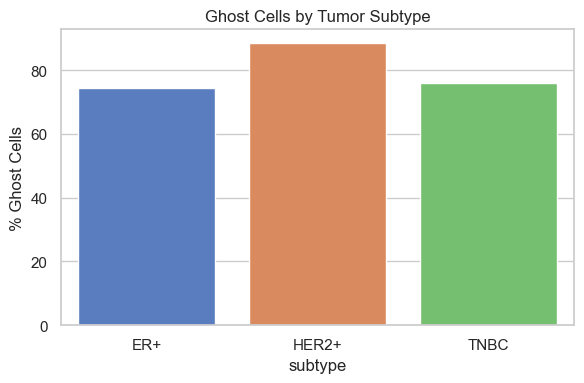

In [ ]:
## 1. Ghost Cell Proportion by Tumor Subtype
import seaborn as sns
import matplotlib.pyplot as plt

# Group and calculate proportion of ghost cells by tumor subtype
ghost_by_subtype = (
    adata.obs.groupby('subtype')['ghost_class']
    .agg(['sum', 'count'])
    .rename(columns={'sum': 'ghost_cells', 'count': 'total_cells'})
)
ghost_by_subtype['ghost_pct'] = 100 * ghost_by_subtype['ghost_cells'] / ghost_by_subtype['total_cells']
ghost_by_subtype = ghost_by_subtype.reset_index()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(data=ghost_by_subtype, x='subtype', y='ghost_pct', palette='muted')
plt.ylabel('% Ghost Cells')
plt.title('Ghost Cells by Tumor Subtype')
plt.tight_layout()
plt.show()

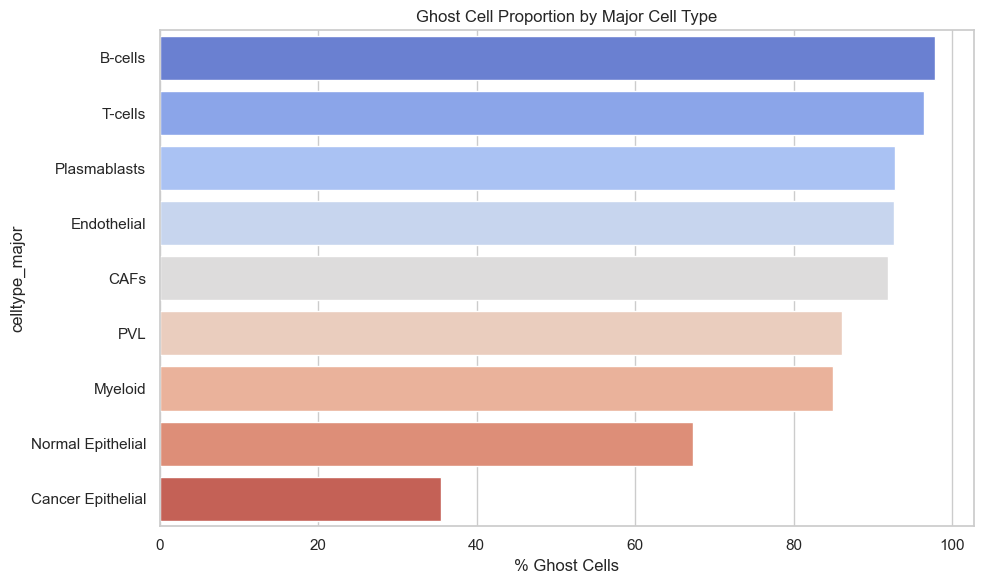

In [ ]:
## 2. Ghost Cell Proportion by Major Cell Type
# Group and calculate proportion of ghost cells by major cell type
ghost_by_major = (
    adata.obs.groupby('celltype_major')['ghost_class']
    .agg(['sum', 'count'])
    .rename(columns={'sum': 'ghost_cells', 'count': 'total_cells'})
)
ghost_by_major['ghost_pct'] = 100 * ghost_by_major['ghost_cells'] / ghost_by_major['total_cells']
ghost_by_major = ghost_by_major.reset_index().sort_values(by='ghost_pct', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=ghost_by_major, y='celltype_major', x='ghost_pct', palette='coolwarm')
plt.xlabel('% Ghost Cells')
plt.title('Ghost Cell Proportion by Major Cell Type')
plt.tight_layout()
plt.show()

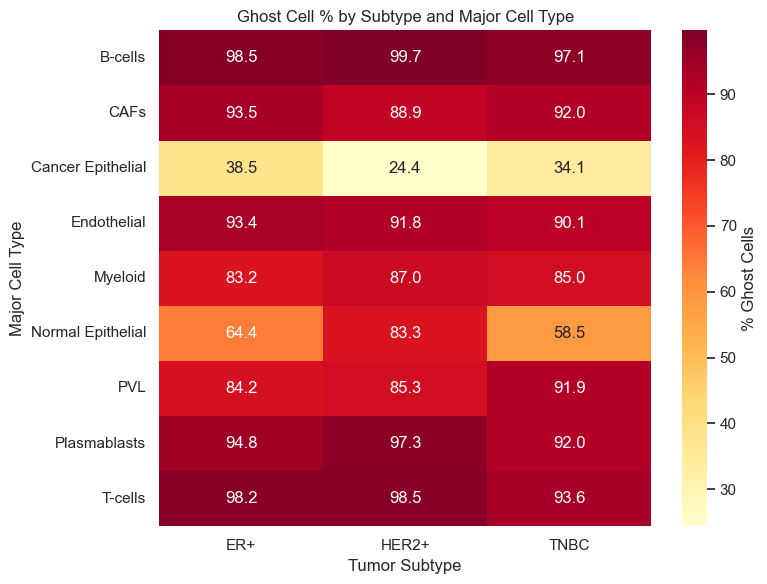

In [ ]:
## 3. Heatmap of Ghost Cell Proportion by Subtype × Major Cell Type
# Create a pivot table for heatmap
heatmap_data = (
    adata.obs
    .groupby(['subtype', 'celltype_major'])['ghost_class']
    .agg(['sum', 'count'])
    .reset_index()
)
heatmap_data['ghost_pct'] = 100 * heatmap_data['sum'] / heatmap_data['count']
pivot_table = heatmap_data.pivot(index='celltype_major', columns='subtype', values='ghost_pct')

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': '% Ghost Cells'})
plt.title("Ghost Cell % by Subtype and Major Cell Type")
plt.ylabel("Major Cell Type")
plt.xlabel("Tumor Subtype")
plt.tight_layout()
plt.show()

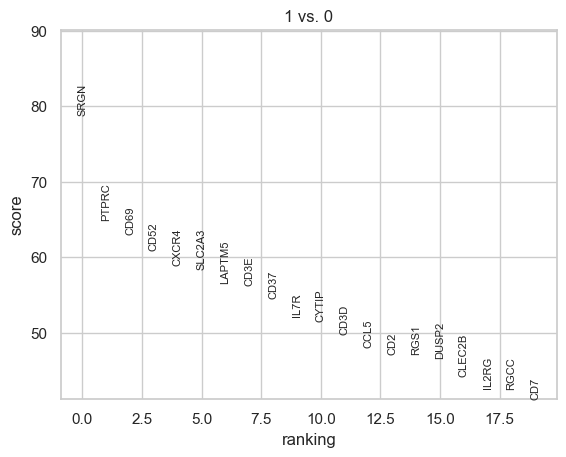

genes  logfoldchanges  pvals_adj
0     SRGN        1.999902        0.0
1    PTPRC        1.636742        0.0
2     CD69        3.782225        0.0
3     CD52        1.495304        0.0
4    CXCR4        3.138983        0.0
5   SLC2A3        1.815232        0.0
6   LAPTM5        1.363732        0.0
7     CD3E        1.741639        0.0
8     CD37        1.676312        0.0
9     IL7R        3.281678        0.0
10   CYTIP        1.774336        0.0
11    CD3D        1.492448        0.0
12    CCL5        3.045331        0.0
13     CD2        1.532656        0.0
14    RGS1        1.852971        0.0
15   DUSP2        1.700614        0.0
16  CLEC2B        1.351444        0.0
17   IL2RG        0.883640        0.0
18    RGCC        1.740424        0.0
19     CD7        1.526286        0.0

In [ ]:
import scanpy as sc

# Choose groups for comparison
# Here we compare ghost vs. non-ghost cells
adata.obs['ghost_class'] = adata.obs['ghost_class'].astype(str)  # Make sure it's string type

# Run DE analysis
sc.tl.rank_genes_groups(
    adata,
    groupby='ghost_class',
    reference='0',  # Non-ghosts as reference
    method='wilcoxon',  # robust non-parametric test
    key_added='ghost_DE'
)

# Visualize top DE genes
sc.pl.rank_genes_groups(adata, key='ghost_DE', groups=['1'], n_genes=20, sharey=False)


# Extract results
de_results = pd.DataFrame({
    'genes': adata.uns['ghost_DE']['names']['1'],
    'logfoldchanges': adata.uns['ghost_DE']['logfoldchanges']['1'],
    'pvals_adj': adata.uns['ghost_DE']['pvals_adj']['1']
})

# View top DE genes
de_results.head(20)

In [108]:
import os
import urllib.request
import pandas as pd
from gtfparse import read_gtf
import scanpy as sc
import infercnvpy as cnv

gtf_url = "https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_44/gencode.v44.annotation.gtf.gz"
gtf_file = "gencode.v44.annotation.gtf.gz"

if not os.path.exists(gtf_file):
    print("📥 Downloading GTF file...")
    urllib.request.urlretrieve(gtf_url, gtf_file)
else:
    print("✅ GTF file already exists.")

# Load and filter for gene info
gtf = read_gtf(gtf_file).to_pandas()
genes = gtf[gtf["feature"] == "gene"]
gene_pos = genes[["gene_name", "seqname", "start", "end"]].drop_duplicates()
gene_pos.columns = ["gene", "chromosome", "start", "end"]

✅ GTF file already exists.


In [ ]:
##STEP 2: Merge gene location with adata.var
# Match gene names
adata.var["gene"] = adata.var_names
gene_pos_filtered = gene_pos[gene_pos["gene"].isin(adata.var["gene"])].drop_duplicates(subset="gene")
gene_pos_filtered = gene_pos_filtered.set_index("gene")

# Merge and reindex
merged_var = adata.var.join(gene_pos_filtered, on="gene")
merged_var = merged_var.reindex(adata.var_names)
adata.var = merged_var

print("✅ Chromosomal annotations added to adata.var")

✅ Chromosomal annotations added to adata.var


In [ ]:
##STEP 3: Define reference group using Normal Epithelial cells
# Create reference labels
adata.obs["cnv_reference"] = "tumor"
adata.obs.loc[adata.obs["celltype_major"] == "Normal Epithelial", "cnv_reference"] = "normal"

print("🔍 CNV reference group counts:\n", adata.obs["cnv_reference"].value_counts())

## STEP 4: Run inferCNV with infercnvpy
import infercnvpy as cnv

cnv.tl.infercnv(
    adata,
    reference_key="cnv_reference",
    reference_cat="normal",
    window_size=100,
    step=10,
    n_jobs=4  # Adjust depending on your CPU
)

print("✅ CNV inference completed.")

🔍 CNV reference group counts:
 cnv_reference
tumor     95709
normal     4355
Name: count, dtype: int64


  0%|          | 0/21 [00:00<?, ?it/s]

✅ CNV inference completed.


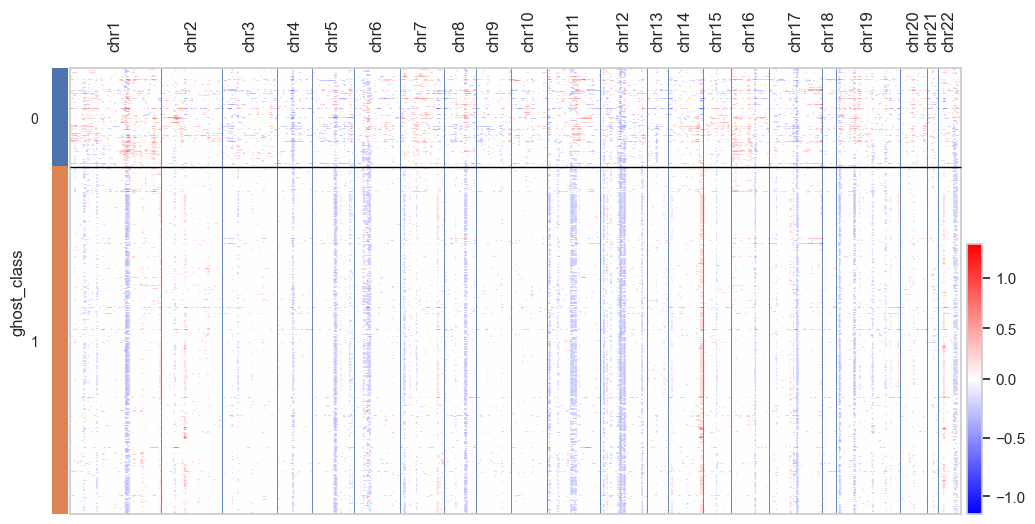

In [ ]:
##STEP 5: Visualize CNV heatmap by ghost class
# Plot CNV signal by ghost classification
cnv.pl.chromosome_heatmap(
    adata,
    groupby="ghost_class",
    figsize=(12, 6),
    dendrogram=False
)

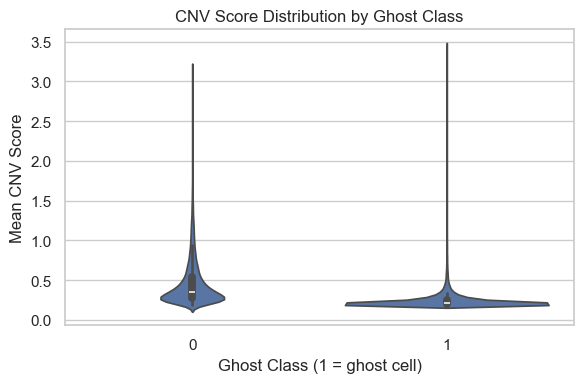

In [ ]:
## Step-by-step CNV Scoring on Selected Chromosomes

import numpy as np
import pandas as pd

# Step 1: Ensure chromosome formatting is consistent
adata.var["chromosome"] = adata.var["chromosome"].astype(str).str.replace("chr", "").str.upper()

# Step 2: Define high-CNV burden chromosomes based on literature
selected_chroms = ["1", "6", "7", "10", "14", "18"]

# Step 3: Subset genes from these chromosomes
cnv_genes = adata.var[adata.var["chromosome"].isin(selected_chroms)]

# Step 4: Subset the AnnData object to CNV-related genes
adata_cnv = adata[:, cnv_genes.index].copy()

# Step 5: Normalize expression per gene (Z-score across all cells)
# This helps detect CNV-like expression shifts (amplifications/deletions)
sc.pp.scale(adata_cnv, zero_center=True, max_value=10)  # Clip extreme values

# Step 6: Calculate CNV score as mean absolute Z-score per cell
adata.obs['cnv_score'] = np.abs(adata_cnv.X).mean(axis=1)

# Step 7: Visualize distribution (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.violinplot(data=adata.obs, x="ghost_class", y="cnv_score")
plt.title("CNV Score Distribution by Ghost Class")
plt.xlabel("Ghost Class (1 = ghost cell)")
plt.ylabel("Mean CNV Score")
plt.tight_layout()
plt.show()

In [ ]:
print(adata.obs['cnv_score'].head())
print(adata.obs['cnv_score'].dtype)
print(adata.obs['cnv_score'].isna().sum(), "/", len(adata))  # Missing vs total

CID3586_AAGACCTCAGCATGAG    0.245826
CID3586_AAGGTTCGTAGTACCT    0.194810
CID3586_ACCAGTAGTTGTGGCC    0.190765
CID3586_ACCCACTAGATGTCGG    0.197007
CID3586_ACTGATGGTCAACTGT    0.205192
Name: cnv_score, dtype: float64
float64
0 / 100064


In [ ]:
# Convert ghost_class from categorical string to integer
adata.obs['ghost_class'] = adata.obs['ghost_class'].astype(int)
print("Ghost cell count:", (adata.obs['ghost_class'] == 1).sum())
print("Non-ghost cell count:", (adata.obs['ghost_class'] == 0).sum())

Ghost cell count: 77968
Non-ghost cell count: 22096


In [ ]:
import numpy as np
import scanpy as sc

# Refilter to CNV-prone chromosomes
adata.var["chromosome"] = adata.var["chromosome"].astype(str).str.replace("chr", "").str.upper()
selected_chroms = ["1", "6", "7", "10", "14", "18"]
cnv_genes = adata.var[adata.var["chromosome"].isin(selected_chroms)]

# Subset and scale
adata_cnv = adata[:, cnv_genes.index].copy()
sc.pp.scale(adata_cnv, zero_center=True, max_value=10)

# Calculate CNV score
adata.obs['cnv_score'] = np.abs(adata_cnv.X).mean(axis=1)

print("Ghost cell count:", (adata.obs['ghost_class'] == 1).sum())
print("Non-ghost cell count:", (adata.obs['ghost_class'] == 0).sum())

Ghost cell count: 77968
Non-ghost cell count: 22096


In [ ]:

from scipy.stats import mannwhitneyu

# Group CNV scores
group_1 = adata.obs.loc[adata.obs['ghost_class'] == 1, 'cnv_score']
group_0 = adata.obs.loc[adata.obs['ghost_class'] == 0, 'cnv_score']

# Mean comparison
print(f"Mean CNV score for ghost cells     (ghost_class=1): {group_1.mean():.4f}")
print(f"Mean CNV score for non-ghost cells (ghost_class=0): {group_0.mean():.4f}")

# Statistical test
stat, p = mannwhitneyu(group_1, group_0, alternative='two-sided')
print(f"Mann-Whitney U Test: U={stat:.1f}, p-value={p:.2e}")

Mean CNV score for ghost cells     (ghost_class=1): 0.2491
Mean CNV score for non-ghost cells (ghost_class=0): 0.4618
Mann-Whitney U Test: U=239158768.0, p-value=0.00e+00


In [ ]:
adata.obs.groupby("subtype")["ghost_class"].mean()

subtype
ER+      0.745901
HER2+    0.884004
TNBC     0.761503
Name: ghost_class, dtype: float64

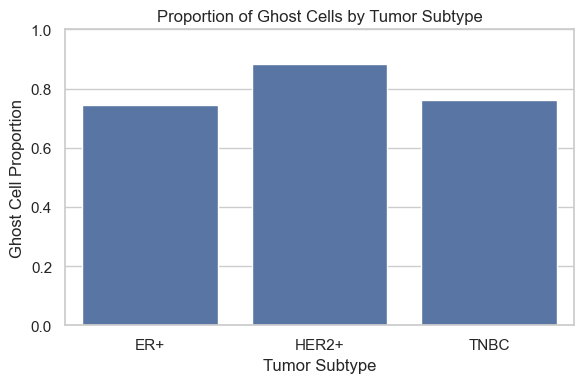

In [ ]:
# Ensure 'ghost_class' is treated as string (not categorical object)
adata.obs['ghost_class'] = adata.obs['ghost_class'].astype(str)

# Compute proportion of ghost cells per subtype
ghost_prop = (
    adata.obs.groupby("subtype")["ghost_class"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

# Filter only ghost cells (label = '1')
ghost_prop_ghosts = ghost_prop[ghost_prop["ghost_class"] == "1"]

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=ghost_prop_ghosts, x="subtype", y="proportion")
plt.title("Proportion of Ghost Cells by Tumor Subtype")
plt.ylabel("Ghost Cell Proportion")
plt.xlabel("Tumor Subtype")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

shap_values.shape: (100, 8, 2)


<Figure size 640x480 with 0 Axes>

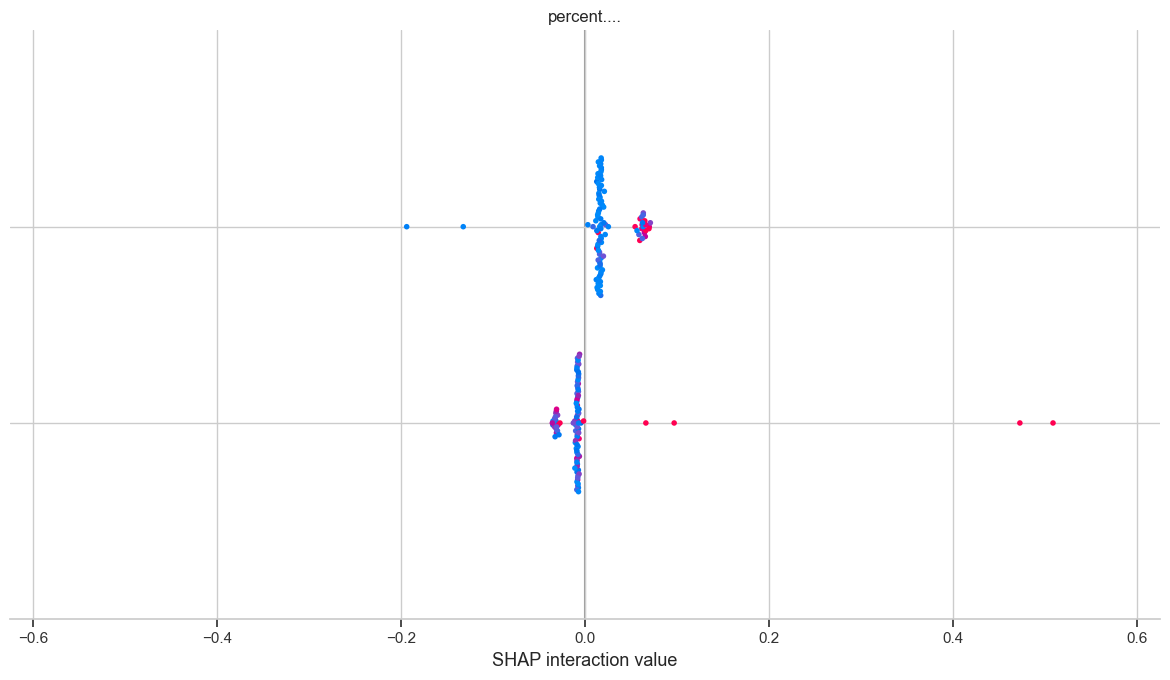

In [ ]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# --- Step 1: Setup ---
features = ['nCount_RNA', 'percent.mito', 'S_score', 'G2M_score',
            'apoptosis_score', 'pct_counts_ribo', 'oxphos_score', 'cnv_score']
target = 'ghost_class'

df = adata.obs[features + [target]].dropna().copy()
df[target] = df[target].astype(int)

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# --- Step 2: Train model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Step 3: Create SHAP explainer ---
explainer = shap.Explainer(model, X_train)

# --- Step 4: Use a proper sample and get SHAP values ---
sample_data = X_test.sample(n=100, random_state=42)
shap_values = explainer(sample_data)  # <-- NEW style returns Explanation object

# --- Step 5: Confirm shape ---
print("shap_values.shape:", shap_values.shape)  # (100, 8)

# --- Step 6: Summary plot ---
shap.summary_plot(shap_values, sample_data, feature_names=features)

In [122]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

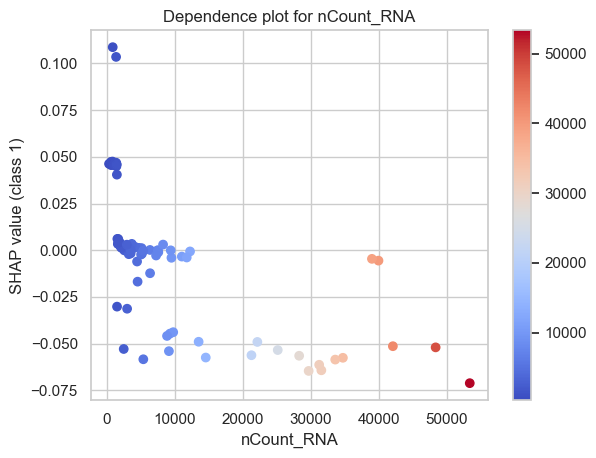

In [ ]:
# For class 1 (ghost = 1)
shap_vals_class1 = shap_values.values[:, :, 1]  # shape: (100, 8)

# Plot one feature manually (e.g., 'nCount_RNA')
import matplotlib.pyplot as plt
import numpy as np

feat = 'nCount_RNA'
i = features.index(feat)

plt.scatter(sample_data[feat], shap_vals_class1[:, i], c=sample_data[feat], cmap='coolwarm')
plt.xlabel(feat)
plt.ylabel("SHAP value (class 1)")
plt.title(f"Dependence plot for {feat}")
plt.colorbar()
plt.show()

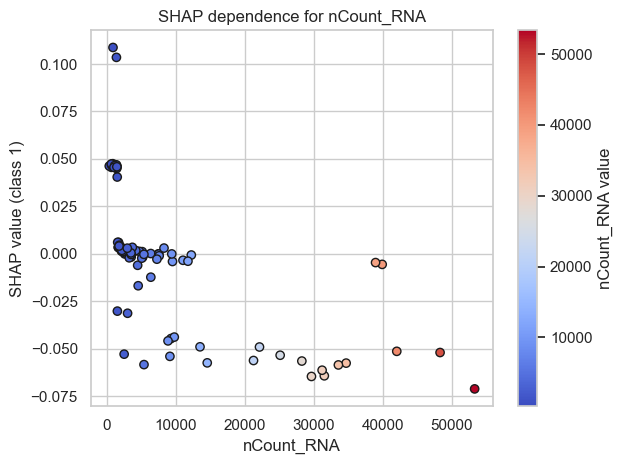

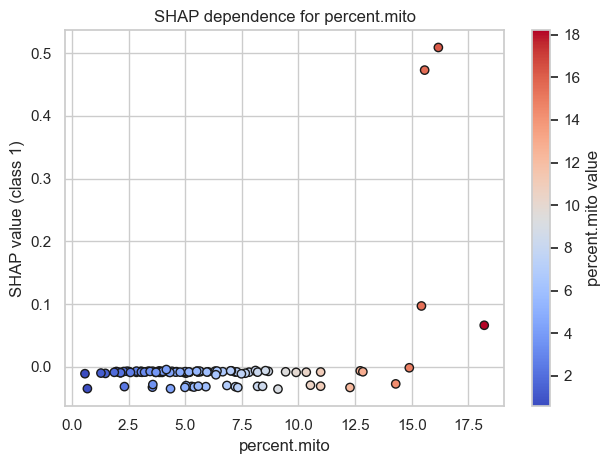

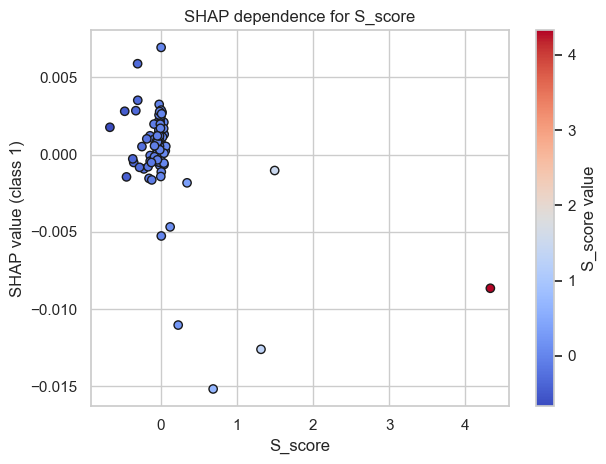

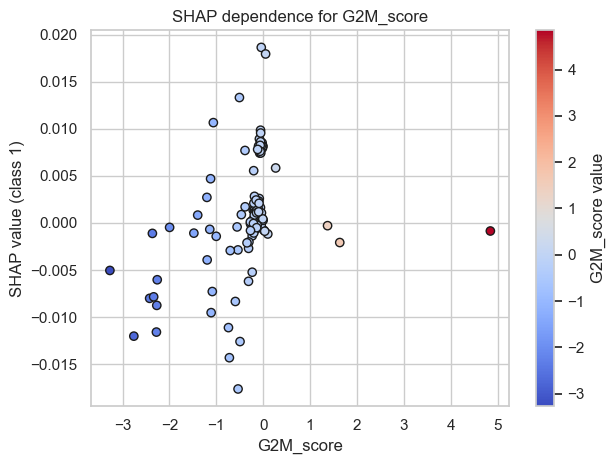

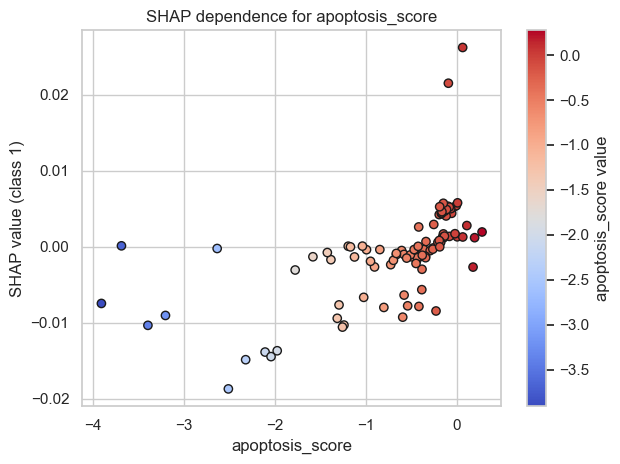

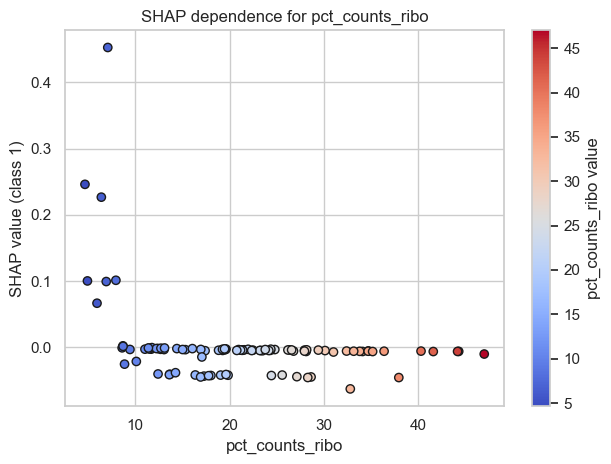

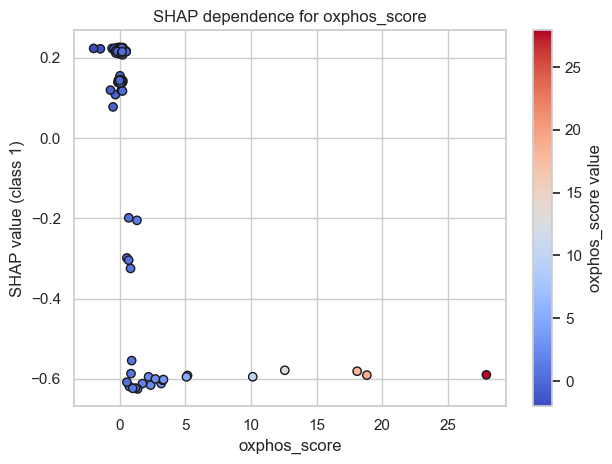

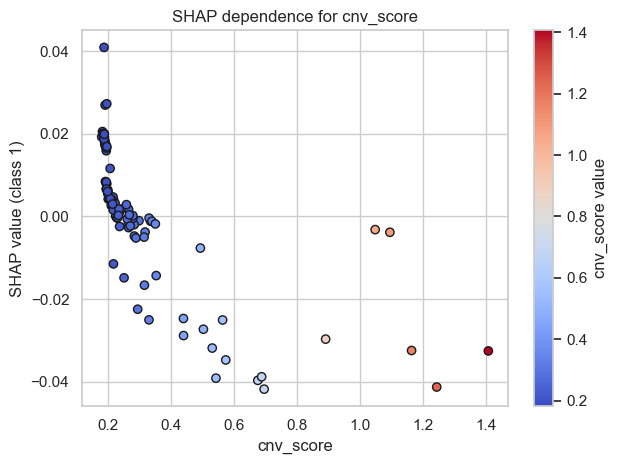

In [ ]:
# Loop through all features and plot dependence
for feat in features:
    i = features.index(feat)
    shap_vals = shap_values.values[:, :, 1][:, i]       # Class 1 SHAP values for this feature
    feature_vals = sample_data[feat].values             # Raw feature values for color and x-axis

    plt.figure()
    plt.scatter(feature_vals, shap_vals, c=feature_vals, cmap='coolwarm', edgecolor='k')
    plt.xlabel(feat)
    plt.ylabel("SHAP value (class 1)")
    plt.title(f"SHAP dependence for {feat}")
    plt.colorbar(label=f"{feat} value")
    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np

# Extract SHAP values for class 1
shap_vals_class1 = shap_values.values[:, :, 1]  # shape: (100, 8)

# Compute mean absolute SHAP values for each feature
mean_abs_shap = np.abs(shap_vals_class1).mean(axis=0)

# Print sorted feature ranking
print("🔢 Feature Ranking by Mean |SHAP| (Class 1):")
for feat, val in sorted(zip(features, mean_abs_shap), key=lambda x: -x[1]):
    print(f"{feat:20s}: {val:.5f}")

🔢 Feature Ranking by Mean |SHAP| (Class 1):
oxphos_score        : 0.28120
pct_counts_ribo     : 0.02471
percent.mito        : 0.02410
nCount_RNA          : 0.02398
cnv_score           : 0.01200
G2M_score           : 0.00454
apoptosis_score     : 0.00418
S_score             : 0.00169


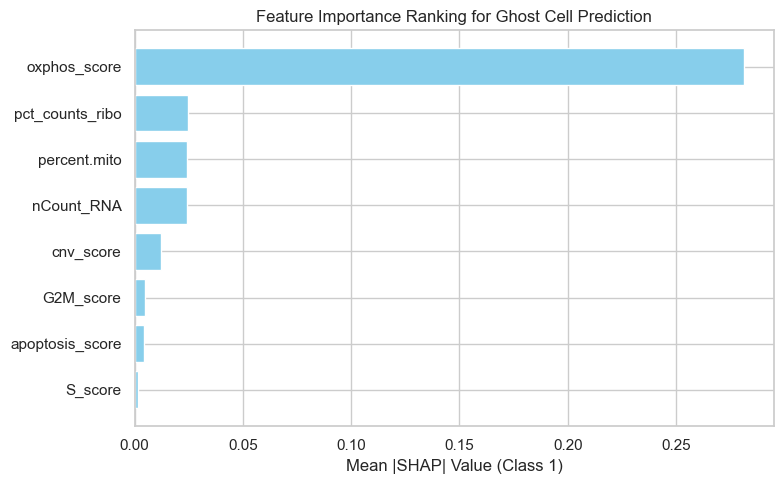

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot
sorted_feats = sorted(zip(features, mean_abs_shap), key=lambda x: -x[1])
feat_names, shap_scores = zip(*sorted_feats)

plt.figure(figsize=(8, 5))
plt.barh(feat_names[::-1], shap_scores[::-1], color='skyblue')
plt.xlabel("Mean |SHAP| Value (Class 1)")
plt.title("Feature Importance Ranking for Ghost Cell Prediction")
plt.tight_layout()
plt.show()

In [ ]:
import pickle
with open("adata.pkl", "wb") as f:
    pickle.dump(adata, f)

adata.obs.to_csv("adata_obs_full.csv")

In [ ]:
df = pd.read_csv("adata_obs_full.csv")

print(df['cnv_reference'].unique())

['tumor' 'normal']


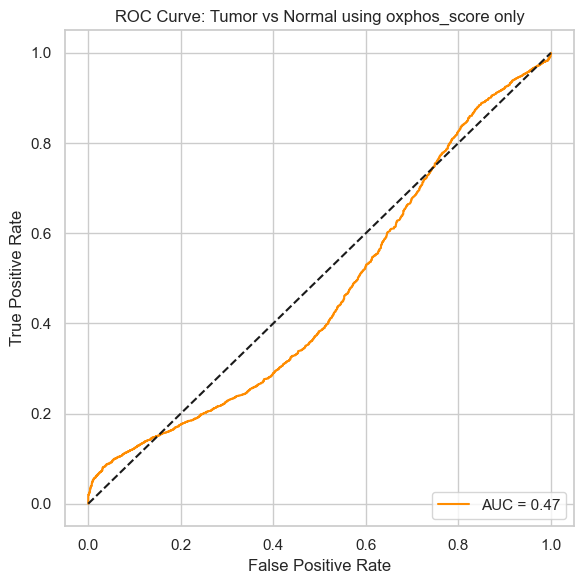

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Use oxphos_score as the sole feature
X_one = df[['oxphos_score']].copy()
y = df['cnv_reference'].map({'tumor': 1, 'normal': 0}).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_one, y, test_size=0.3, random_state=42, stratify=y)

# Train logistic regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict and compute AUC
y_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve: Tumor vs Normal using oxphos_score only")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

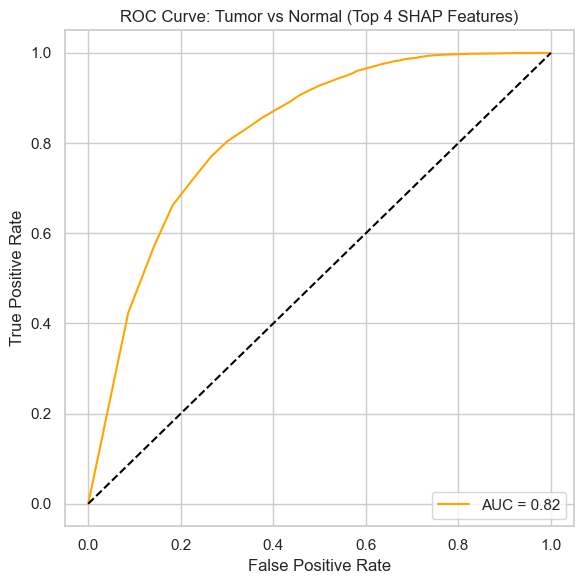

In [142]:
top_features = ["oxphos_score", "pct_counts_ribo", "percent.mito","nCount_RNA"]

# Prepare features (X) and binary target (y)
X = df[top_features].values
y = df["cnv_reference"].map({"tumor": 1, "normal": 0}).values

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities for ROC
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='orange', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Tumor vs Normal (Top 4 SHAP Features)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

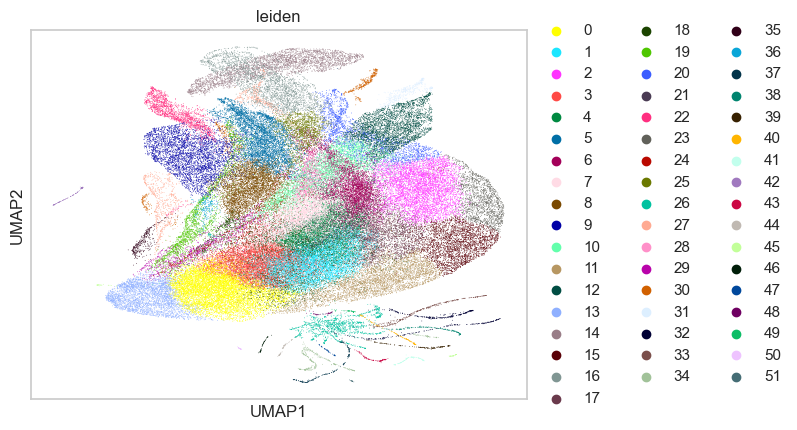

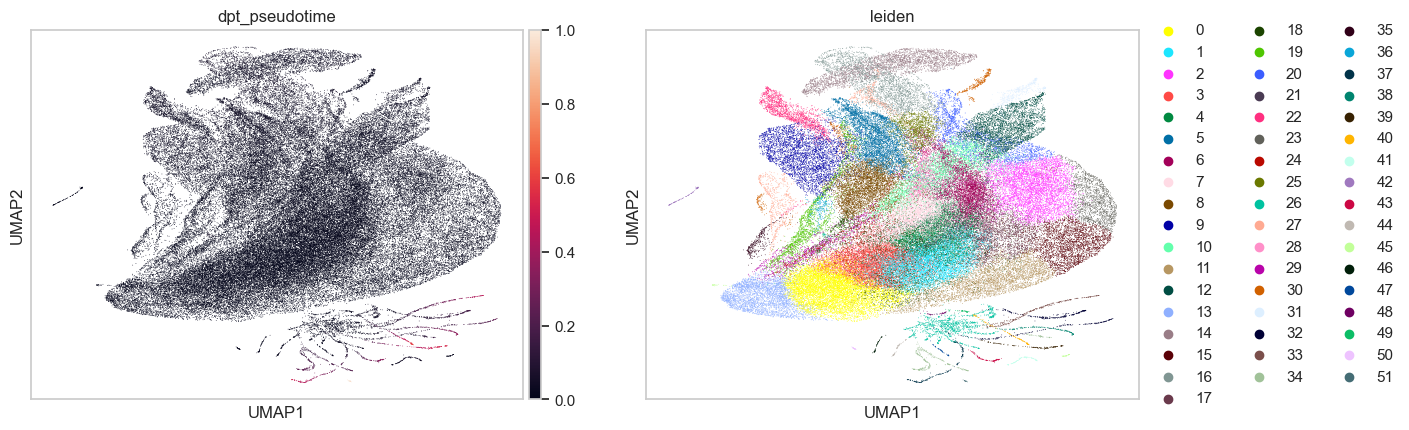

In [ ]:
import scanpy as sc
import pickle

# Step 1: Load AnnData object
with open("adata.pkl", "rb") as f:
    adata = pickle.load(f)

# Step 2: Ensure X is float
adata.X = adata.X.astype('float32')

# Step 3: PCA, neighbors, and UMAP
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

# Step 4: Leiden clustering (optional, helps with root cell selection)
sc.tl.leiden(adata)
sc.pl.umap(adata, color='leiden')

# Step 5: Diffusion map and pseudotime
sc.tl.diffmap(adata)

# Manually set root cell index if known (can also use a specific leiden cluster)
# For example, select root cell as one in a specific cluster:
root_cluster = '0'
root_cell_idx = adata.obs[adata.obs['leiden'] == root_cluster].index[0]
adata.uns['iroot'] = adata.obs_names.get_loc(root_cell_idx)

# Compute pseudotime
sc.tl.dpt(adata)

# Step 6: Plot UMAP colored by pseudotime and cluster
sc.pl.umap(adata, color=['dpt_pseudotime', 'leiden'])

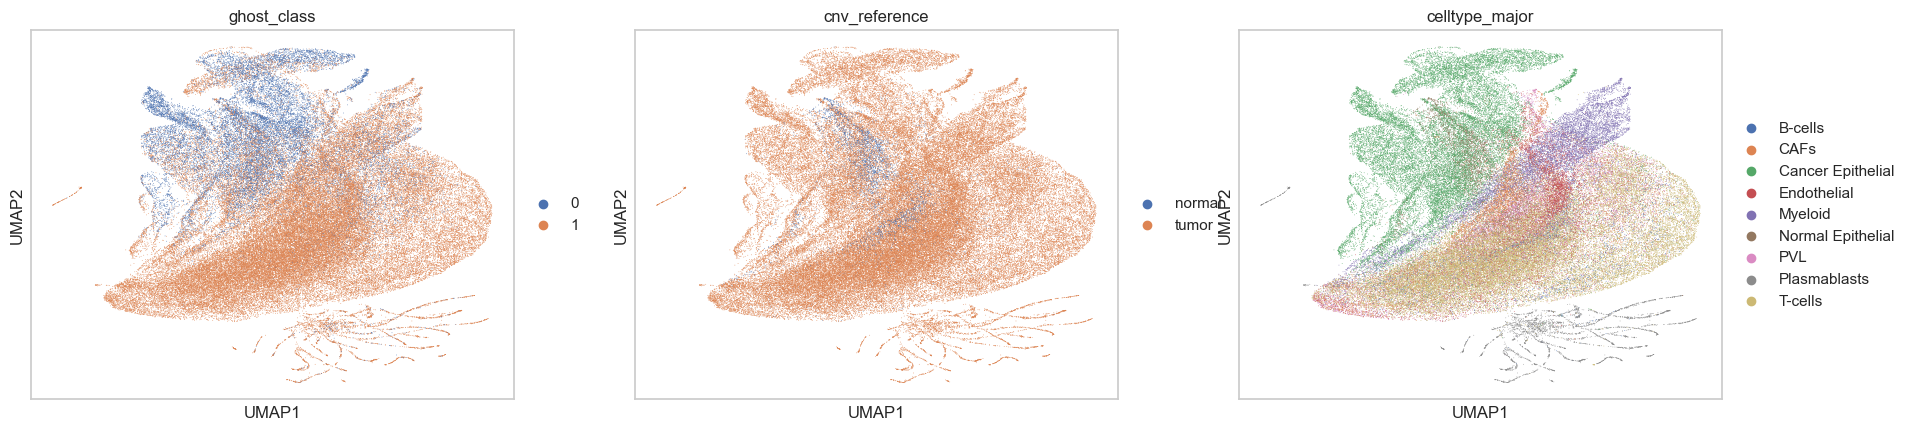

In [ ]:
sc.pl.umap(adata, color=['ghost_class', 'cnv_reference', 'celltype_major'])

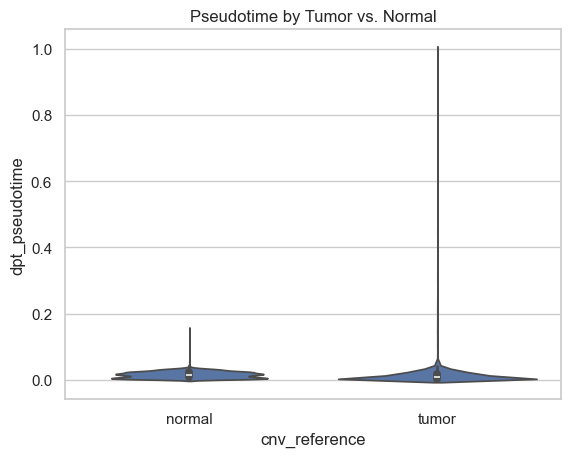

In [145]:
sns.violinplot(data=adata.obs, x='cnv_reference', y='dpt_pseudotime')
plt.title("Pseudotime by Tumor vs. Normal")
plt.show()

In [ ]:
df_obs = pd.read_csv("adata_obs_full.csv", index_col=0)

# 3. Merge dpt_pseudotime from adata.obs (must match index!)
df_obs["dpt_pseudotime"] = adata.obs.loc[df_obs.index, "dpt_pseudotime"]

# 4. Save the new file
df_obs.to_csv("adata_obs_with_pseudotime.csv")

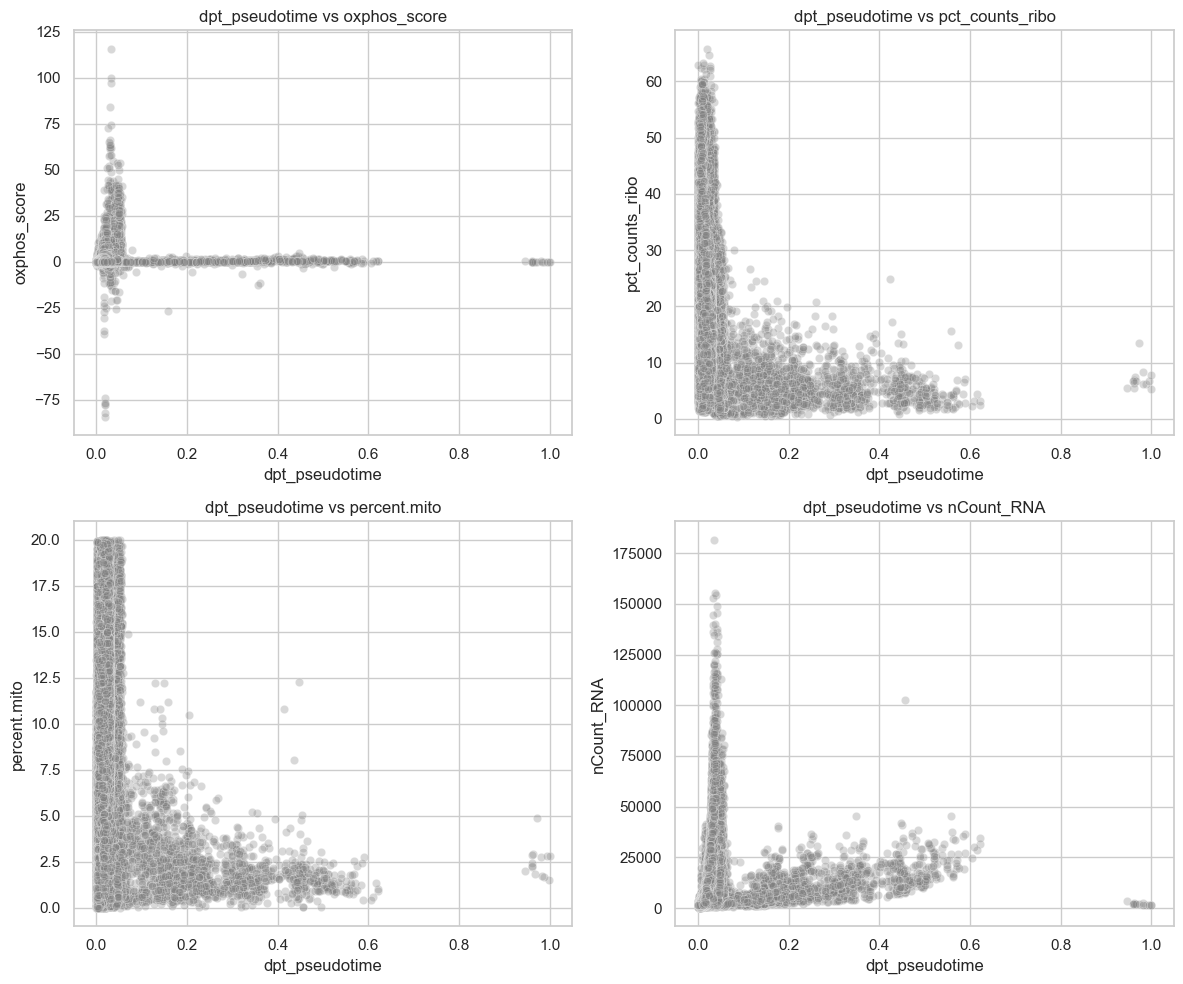

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load updated CSV with pseudotime
df = pd.read_csv("adata_obs_with_pseudotime.csv", index_col=0)

# Top 4 SHAP features to plot
top_features = ['oxphos_score', 'pct_counts_ribo', 'percent.mito', 'nCount_RNA']

# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(top_features):
    sns.scatterplot(
        x='dpt_pseudotime',
        y=feature,
        data=df,
        color='gray',
        alpha=0.3,
        ax=axes[i]
    )
    axes[i].set_title(f'dpt_pseudotime vs {feature}')
    axes[i].set_xlabel('dpt_pseudotime')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

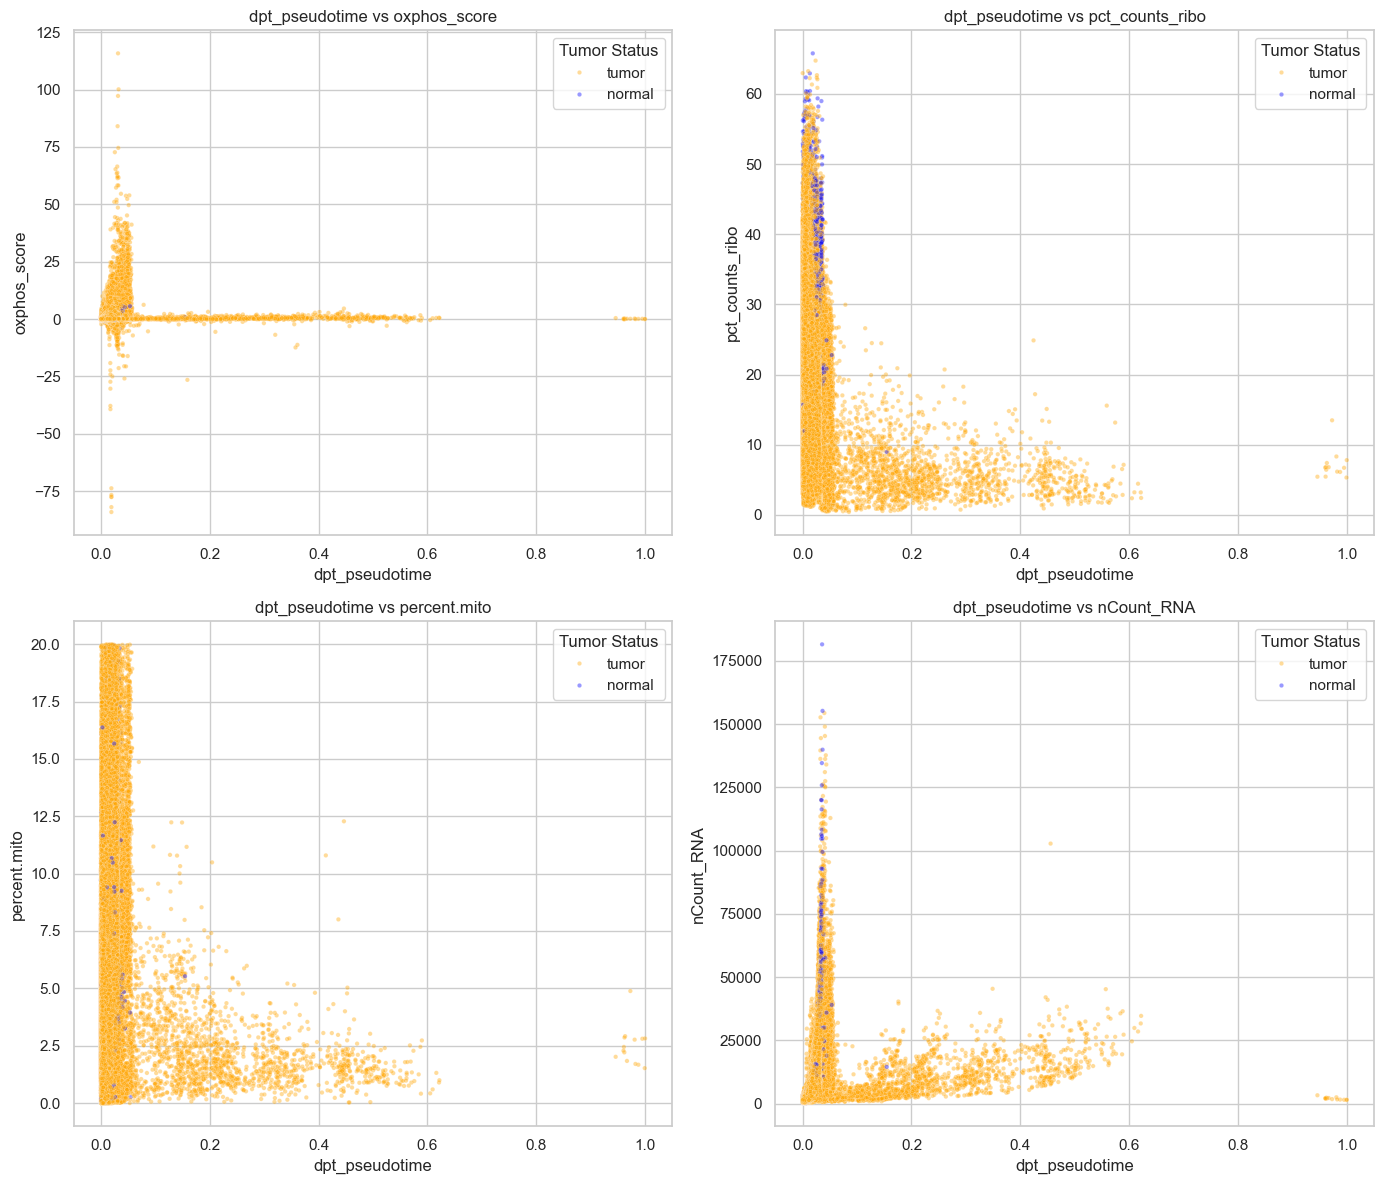

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated CSV
df = pd.read_csv("adata_obs_with_pseudotime.csv")

# Set style
sns.set(style="whitegrid")

# Features to plot
features = ['oxphos_score', 'pct_counts_ribo', 'percent.mito', 'nCount_RNA']
colors = {'tumor': 'orange', 'normal': 'blue'}

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

# Plot each feature against pseudotime with tumor/normal overlay
for i, feature in enumerate(features):
    ax = axs[i]
    sns.scatterplot(
        data=df, x='dpt_pseudotime', y=feature,
        hue='cnv_reference', palette=colors, alpha=0.4, s=10, ax=ax
    )
    ax.set_title(f'dpt_pseudotime vs {feature}')
    ax.legend(title='Tumor Status', loc='best')

plt.tight_layout()
plt.show()

Classification Report:

              precision    recall  f1-score   support

      Normal       0.76      0.21      0.32      1089
       Tumor       0.97      1.00      0.98     23927

    accuracy                           0.96     25016
   macro avg       0.86      0.60      0.65     25016
weighted avg       0.96      0.96      0.95     25016



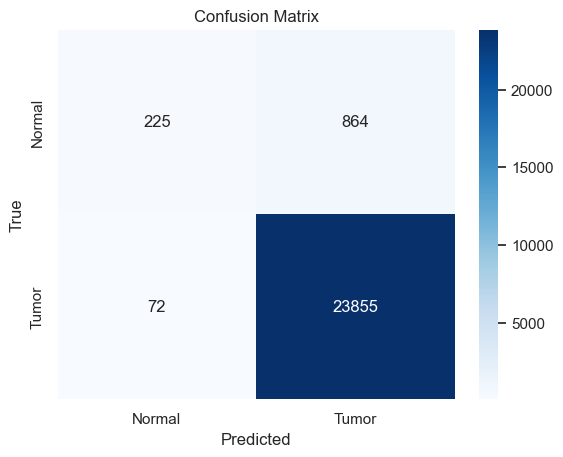

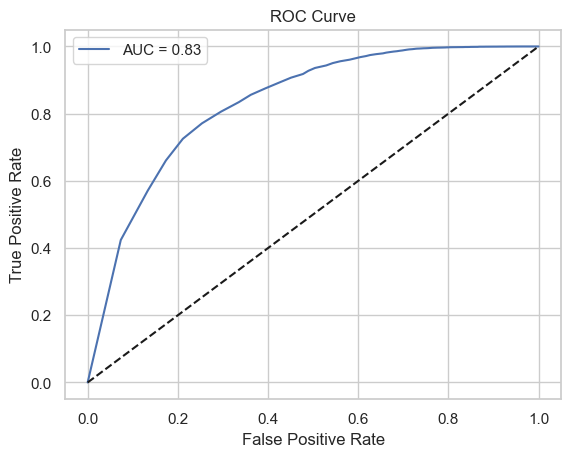

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 4 SHAP features
top4_features = ['oxphos_score', 'pct_counts_ribo', 'percent.mito', 'nCount_RNA']

# Prepare data
X = df[top4_features]
y = df['cnv_reference'].map({'normal': 0, 'tumor': 1})  # binary target

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Retrain model
from sklearn.ensemble import RandomForestClassifier
model_top4 = RandomForestClassifier(n_estimators=100, random_state=42)
model_top4.fit(X_train, y_train)

# Predict
y_pred = model_top4.predict(X_test)
y_proba = model_top4.predict_proba(X_test)[:, 1]

# Print metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Tumor']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Tumor'], yticklabels=['Normal', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

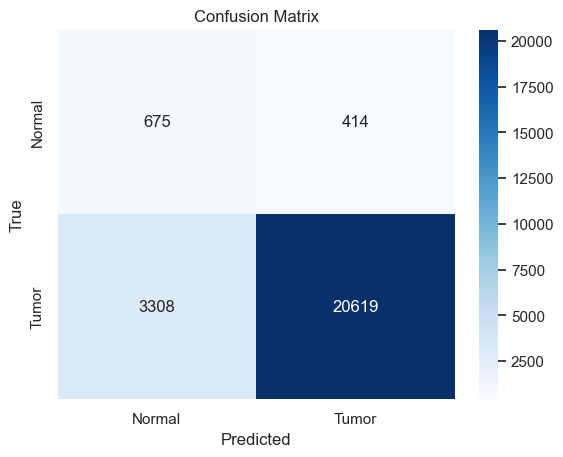

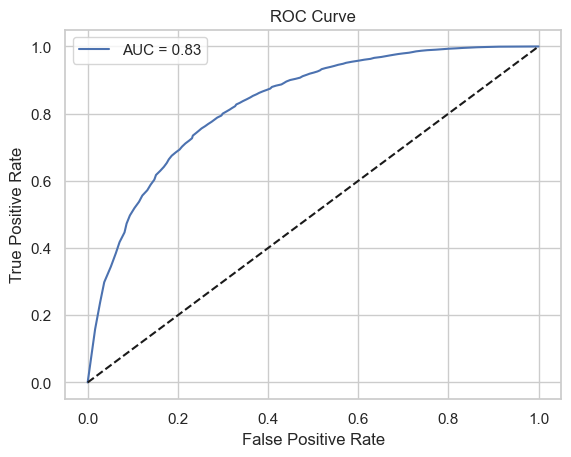

In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import auc as sklearn_auc
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Fit Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_res, y_train_res)

label_encoder = LabelEncoder()
# Predict
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Tumor'], yticklabels=['Normal', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
#roc_auc = auc(fpr, tpr)
roc_auc = sklearn_auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Classification report

/Users/adi/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [10:19:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


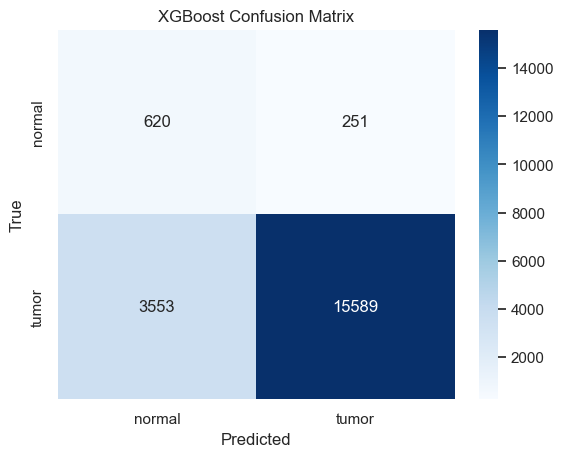

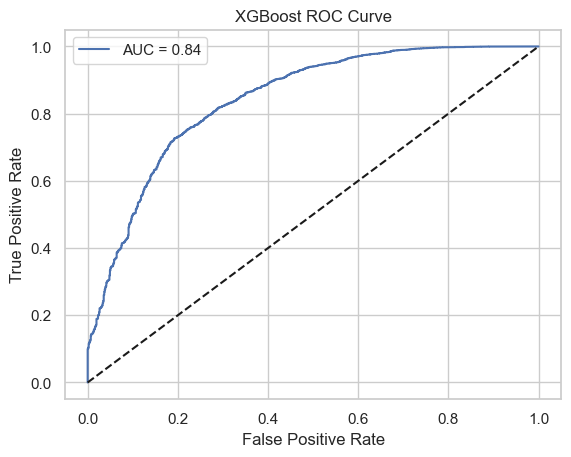

Classification Report:

              precision    recall  f1-score   support

      normal       0.15      0.71      0.25       871
       tumor       0.98      0.81      0.89     19142

    accuracy                           0.81     20013
   macro avg       0.57      0.76      0.57     20013
weighted avg       0.95      0.81      0.86     20013



In [151]:
from xgboost import XGBClassifier

features = ['oxphos_score', 'pct_counts_ribo', 'percent.mito', 'nCount_RNA']
X = df[features]
y = df['cnv_reference']

# Encode target labels (normal/tumor → 0/1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split before SMOTE to evaluate on real distribution
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_sm, y_train_sm)

# Predict and evaluate
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('XGBoost Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = sklearn_auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

/Users/adi/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [10:39:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


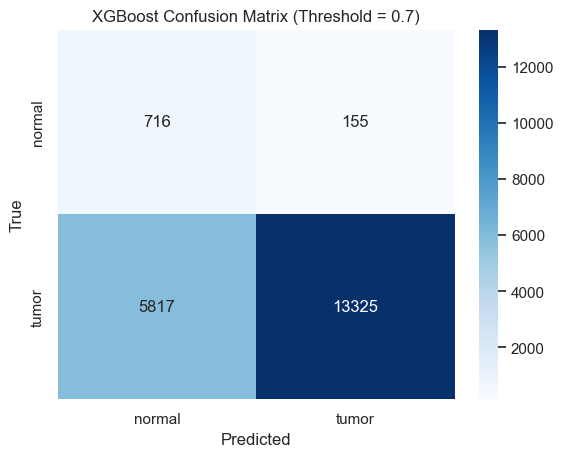

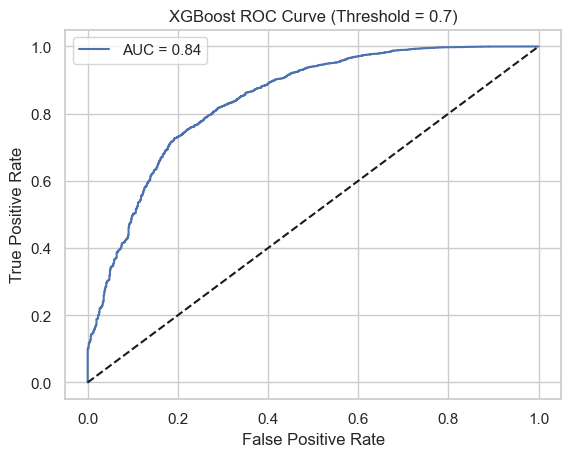

Classification Report:

              precision    recall  f1-score   support

      normal       0.11      0.82      0.19       871
       tumor       0.99      0.70      0.82     19142

    accuracy                           0.70     20013
   macro avg       0.55      0.76      0.51     20013
weighted avg       0.95      0.70      0.79     20013



In [ ]:
# 2. Encode tumor vs normal
label_encoder = LabelEncoder()
df['cnv_reference_encoded'] = label_encoder.fit_transform(df['cnv_reference'])  # normal=0, tumor=1

# 3. Features and target
features = ['oxphos_score', 'pct_counts_ribo', 'percent.mito', 'nCount_RNA']
X = df[features]
y = df['cnv_reference_encoded']

# 4. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# 6. XGBoost Classifier (AUC-PR optim)
xgb = XGBClassifier(eval_metric='aucpr', use_label_encoder=False, random_state=42)
xgb.fit(X_train_sm, y_train_sm)

# 7. Predict + Threshold tuning
y_prob = xgb.predict_proba(X_test)[:, 1]
threshold = 0.7  # increase for higher precision
y_pred = (y_prob > threshold).astype(int)

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("XGBoost Confusion Matrix (Threshold = 0.7)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 9. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = sklearn_auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve (Threshold = 0.7)")
plt.legend()
plt.show()

# 10. Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

In [ ]:
from sklearn.metrics import roc_auc_score

y_train_pred = model.predict_proba(X_train)[:, 1]
y_test_pred = model.predict_proba(X_test)[:, 1]

print("Train AUC:", roc_auc_score(y_train, y_train_pred))
print("Test AUC :", roc_auc_score(y_test, y_test_pred))

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- G2M_score
- S_score
- apoptosis_score
- cnv_score


In [ ]:
import gseapy as gp
import pandas as pd

available_libraries = gp.get_library_name(organism='Human')
print("Available gene set libraries for Human:")
print(available_libraries)

# Step 2: Load the Hallmark gene sets properly (MSigDB capitalizes it as "MSigDB Hallmark")
# We check for "MSigDB_Hallmark_2020" or similar from the list above
hallmark_name = [lib for lib in available_libraries if "hallmark" in lib.lower()][0]
print(f"\nUsing Hallmark library: {hallmark_name}")

# Step 3: Retrieve Hallmark gene sets
hallmark = gp.get_library(name=hallmark_name, organism='Human')

# Step 4: Convert to DataFrame
hallmark_genes = [(gs, gene) for gs, genes in hallmark.items() for gene in genes]
df_hallmark = pd.DataFrame(hallmark_genes, columns=["GeneSet", "Gene"])

# Step 5: Preview
print(df_hallmark.head(30))

# Check which hallmark genes are present in your AnnData object
matching_genes = list(set(df_hallmark).intersection(set(adata.var_names)))

print(f"{len(matching_genes)} hallmark genes found in your dataset.")

Available gene set libraries for Human:
['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_2023', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'COMPARTMENTS_Curated_2025', 'COMPARTMENTS_Experimental_2025', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_2024', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DGIdb_Drug_Targets_2024', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_CRISPR_GeneDependency_CellLines_2023', 'DepMap_WG_CRISPR_Scr

In [ ]:

import pandas as pd
import gseapy as gp
import mygene

# Step 1: Download hallmark gene sets
hallmark_dict = gp.get_library(name='MSigDB_Hallmark_2020')

# Step 2: Flatten all gene names into one list
all_hallmark_genes = set()
for gene_list in hallmark_dict.values():
    all_hallmark_genes.update(gene_list)
all_hallmark_genes = list(all_hallmark_genes)

# Step 3: Map gene symbols to ensure they are human gene symbols
mg = mygene.MyGeneInfo()
mapped = mg.querymany(all_hallmark_genes, scopes='symbol', fields='symbol', species='human')

# Step 4: Filter out only successfully mapped gene symbols
mapped_gene_symbols = set(hit['symbol'] for hit in mapped if 'symbol' in hit)

# Step 5: Compare with your dataset's gene names
your_dataset_genes = set(adata.var_names)  # assuming this is your AnnData object
overlapping_genes = list(mapped_gene_symbols & your_dataset_genes)

print(f"✅ Found {len(overlapping_genes)} hallmark genes in your dataset.")
print(overlapping_genes[:20])

INFO:biothings.client:querying 1-1000 ...
INFO:biothings.client:querying 1001-2000 ...
INFO:biothings.client:querying 2001-3000 ...
INFO:biothings.client:querying 3001-4000 ...
INFO:biothings.client:querying 4001-4383 ...
INFO:biothings.client:Finished.
INFO:biothings.client:Pass "returnall=True" to return complete lists of duplicate or missing query terms.


✅ Found 4242 hallmark genes in your dataset.
['SOD3', 'NMUR1', 'CNBP', 'CHPF2', 'MRPL9', 'CTSS', 'PPARA', 'AIFM3', 'ARL8A', 'MET', 'BIK', 'GPX1', 'SMC3', 'MTIF2', 'RPL34', 'BPHL', 'RIBC2', 'TLE4', 'SRPK1', 'TLK1']


In [ ]:
for pathway_name, gene_list in hallmark_dict.items():
    genes_in_data = list(set(gene_list) & set(adata.var_names))
    if len(genes_in_data) >= 5:  # Avoid scoring on tiny sets
        score_name = pathway_name.replace("HALLMARK_", "").lower() + "_score"
        sc.tl.score_genes(adata, gene_list=genes_in_data, score_name=score_name)

In [ ]:
#print(adata.obs.columns.tolist())
print(adata.obs.head())

                         orig.ident  nCount_RNA  nFeature_RNA  percent.mito  \
CID3586_AAGACCTCAGCATGAG    CID3586        4581          1689      1.506221   
CID3586_AAGGTTCGTAGTACCT    CID3586        1726           779      5.793743   
CID3586_ACCAGTAGTTGTGGCC    CID3586        1229           514      1.383238   
CID3586_ACCCACTAGATGTCGG    CID3586        1352           609      1.923077   
CID3586_ACTGATGGTCAACTGT    CID3586        1711           807     13.325541   

                         subtype    celltype_subset     celltype_minor  \
CID3586_AAGACCTCAGCATGAG   HER2+  Endothelial ACKR1  Endothelial ACKR1   
CID3586_AAGGTTCGTAGTACCT   HER2+  Endothelial ACKR1  Endothelial ACKR1   
CID3586_ACCAGTAGTTGTGGCC   HER2+  Endothelial ACKR1  Endothelial ACKR1   
CID3586_ACCCACTAGATGTCGG   HER2+  Endothelial ACKR1  Endothelial ACKR1   
CID3586_ACTGATGGTCAACTGT   HER2+  Endothelial ACKR1  Endothelial ACKR1   

                         celltype_major   S_score  G2M_score  ...  \
CID3586_AAG